In [ ]:
# Copyright 2024 Google LLC
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Building and Deploying a Google Maps API Agent with Reasoning Engine

<table align="left">
  <td style="text-align: center">
    <a href="https://colab.research.google.com/github/GoogleCloudPlatform/generative-ai/blob/main/gemini/reasoning-engine/tutorial_google_maps_agent.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/colab-logo-32px.png" alt="Google Colaboratory logo"><br> Run in Colab
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/colab/import/https:%2F%2Fraw.githubusercontent.com%2FGoogleCloudPlatform%2Fgenerative-ai%2Fmain%2Fgemini%2Freasoning-engine%2Ftutorial_google_maps_agent.ipynb">
      <img width="32px" src="https://lh3.googleusercontent.com/JmcxdQi-qOpctIvWKgPtrzZdJJK-J3sWE1RsfjZNwshCFgE_9fULcNpuXYTilIR2hjwN" alt="Google Cloud Colab Enterprise logo"><br> Run in Colab Enterprise
    </a>
  </td>      
  <td style="text-align: center">
    <a href="https://github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/reasoning-engine/tutorial_google_maps_agent.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/github-logo-32px.png" alt="GitHub logo"><br> View on GitHub
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/workbench/deploy-notebook?download_url=https://raw.githubusercontent.com/GoogleCloudPlatform/generative-ai/main/gemini/reasoning-engine/tutorial_google_maps_agent.ipynb">
      <img src="https://lh3.googleusercontent.com/UiNooY4LUgW_oTvpsNhPpQzsstV5W8F7rYgxgGBD85cWJoLmrOzhVs_ksK_vgx40SHs7jCqkTkCk=e14-rj-sc0xffffff-h130-w32" alt="Vertex AI logo"><br> Open in Vertex AI Workbench
    </a>
  </td>
</table>

<div style="clear: both;"></div>

<b>Share to:</b>

<a href="https://www.linkedin.com/sharing/share-offsite/?url=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/reasoning-engine/tutorial_google_maps_agent.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/8/81/LinkedIn_icon.svg" alt="LinkedIn logo">
</a>

<a href="https://bsky.app/intent/compose?text=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/reasoning-engine/tutorial_google_maps_agent.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/7/7a/Bluesky_Logo.svg" alt="Bluesky logo">
</a>

<a href="https://twitter.com/intent/tweet?url=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/reasoning-engine/tutorial_google_maps_agent.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/5/53/X_logo_2023_original.svg" alt="X logo">
</a>

<a href="https://reddit.com/submit?url=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/reasoning-engine/tutorial_google_maps_agent.ipynb" target="_blank">
  <img width="20px" src="https://redditinc.com/hubfs/Reddit%20Inc/Brand/Reddit_Logo.png" alt="Reddit logo">
</a>

<a href="https://www.facebook.com/sharer/sharer.php?u=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/reasoning-engine/tutorial_google_maps_agent.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/5/51/Facebook_f_logo_%282019%29.svg" alt="Facebook logo">
</a>            


| | |
|-|-|
|Author(s) | [Kristopher Overholt](https://github.com/koverholt) |

## Overview

### Gemini

Gemini is a family of Generative AI models developed by Google DeepMind that is designed for multimodal use cases.

### Function Calling in Gemini

[Function calling](https://cloud.google.com/vertex-ai/docs/generative-ai/multimodal/function-calling) lets developers create a description of a function in their code, then pass that description to a language model in a request. The response from the model includes the name of a function that matches the description and the arguments to call it with.

### Reasoning Engine in Vertex AI

[Reasoning Engine](https://cloud.google.com/vertex-ai/generative-ai/docs/reasoning-engine/overview) (LangChain on Vertex AI) is a managed service that helps you to build and deploy an agent reasoning framework. It gives you the flexibility to choose how much reasoning you want to delegate to the LLM and how much you want to handle with customized code. You can define Python functions that get used as tools via [Gemini Function Calling](https://cloud.google.com/vertex-ai/generative-ai/docs/multimodal/function-calling). Reasoning Engine integrates closely with the Python SDK for the Gemini model in Vertex AI, and it can manage prompts, agents, and examples in a modular way. Reasoning Engine is compatible with LangChain, LlamaIndex, or other Python frameworks.

### Objectives

In this tutorial, you will build and deploy an agent (model, tools, and reasoning) using the Vertex AI SDK for Python.

You'll build and deploy an agent that uses different components of the Google Maps API to help with various tasks related to planning and building a community solar panel project:

- Install the Vertex AI SDK for Python
- Define a model for your agent
- Define Python functions as tools so that our agent can:
   - Geocode addresses to lat/lon coordinates using the Maps Geocoding API
   - Get information about places using the Maps Places API
   - Generate satellite map images using the Maps Static API
   - Generate solar potential map images using the Maps Solar API
- Use the LangChain agent template provided in the Vertex AI SDK for Reasoning Engine
- Test your agent locally before deploying
- Deploy and test your agent on Reasoning Engine in Vertex AI

### Enable APIs and Services

This tutorial uses the following billable components of Google Cloud, which you'll need to enable for this tutorial:

- [Enable Vertex AI API](https://console.cloud.google.com/apis/api/aiplatform.googleapis.com/overview)
- [Enable Maps Geocoding API](https://console.cloud.google.com/apis/api/geocoding-backend.googleapis.com/overview)
- [Enable Maps Places API](https://console.cloud.google.com/apis/api/places-backend.googleapis.com/overview)
- [Enable Maps Static API](https://console.cloud.google.com/apis/api/static-maps-backend.googleapis.com/overview)
- [Enable Maps Solar API](https://console.cloud.google.com/apis/api/solar.googleapis.com/overview)
- [Enable Resource Manager API](https://console.cloud.google.com/apis/api/cloudresourcemanager.googleapis.com/overview)

Learn about [Vertex AI pricing](https://cloud.google.com/vertex-ai/pricing) and use the [Pricing Calculator](https://cloud.google.com/products/calculator/) to generate a cost estimate based on your projected usage.

## Getting Started


### Install Vertex AI SDK for Python

Install the latest version of the Vertex AI SDK for Python as well as extra dependencies related to Reasoning Engine and LangChain:

In [1]:
%pip install --upgrade --quiet \
    "google-cloud-aiplatform[langchain,reasoningengine]" \
    cloudpickle==3.0.0 \
    "pydantic>=2.10" \
    googlemaps \
    google-cloud-storage \
    google-cloud-resource-manager \
    matplotlib \
    rasterio \
    requests

### Restart current runtime

To use the newly installed packages in this Jupyter runtime, you must restart the runtime. You can do this by running the cell below, which will restart the current kernel.

In [2]:
# Restart kernel after installs so that your environment can access the new packages
import IPython

app = IPython.Application.instance()
app.kernel.do_shutdown(True)

<div class="alert alert-block alert-warning">
<b>⚠️ The kernel is going to restart. Please wait until it is finished before continuing to the next step. ⚠️</b>
</div>


### Authenticate your notebook environment (Colab only)

If you are running this notebook on Google Colab, run the following cell to authenticate your environment. This step is not required if you are using [Vertex AI Workbench](https://cloud.google.com/vertex-ai-workbench).

In [3]:
import sys

if "google.colab" in sys.modules:
    from google.colab import auth

    auth.authenticate_user()

### Set Google Cloud project information and initialize Vertex AI SDK

To get started using Vertex AI, you must have an existing Google Cloud project and [enable the Vertex AI API](https://console.cloud.google.com/flows/enableapi?apiid=aiplatform.googleapis.com).

Learn more about [setting up a project and a development environment](https://cloud.google.com/vertex-ai/docs/start/cloud-environment).

In [4]:
PROJECT_ID = "[your-project-id]"  # @param {type:"string"}
LOCATION = "us-central1"  # @param {type:"string"}
STAGING_BUCKET = "gs://[your-staging-bucket]"  # @param {type:"string"}

import vertexai

vertexai.init(project=PROJECT_ID, location=LOCATION, staging_bucket=STAGING_BUCKET)

## Example: Build and Deploy an Agent for Community Solar Project Planning

In this tutorial, you'll build Python functions as tools that the Gemini model will use to help users plan for community solar panel projects.

When designing a community solar project, you'll need to identify potential locations to build your solar project on, look up relevant government offices and suppliers to help you with the planning and implementation process, and review satellite images and solar potential of regions and buildings to find the optimal location to install your solar panels.

Rather than doing all of this research work manually, it would be nice to build and deploy an agent powered by the Gemini model so to help us with these geocoding and mapping tasks along the way?

Let's build an agent that does exactly that!

### Import libraries

In [5]:
from IPython.display import Image, Markdown, display
from google.cloud import resourcemanager_v3, storage
import matplotlib.pyplot as plt
from rasterio.io import MemoryFile
from vertexai.preview import reasoning_engines

### Define generative model

The first component of your agent involves the version of the generative model you want to use in your agent. Here you'll use the Gemini 1.5 Pro model:

In [6]:
model = "gemini-1.5-pro"

### Input your Google Maps API key

Once you've enable the relevant Google Maps APIs, you can [generate a Maps API key](https://developers.google.com/maps/documentation/geocoding/get-api-key) and paste it in the cell below.

You'll use this Maps API key to work with the Maps Geocoding API, Maps Places API, and other Maps APIs using the functions in the next section:

In [7]:
MAPS_API_KEY = "YOUR_MAPS_API_KEY"

### Define Python functions as tools

The second component of your agent involves Python functions as tools, which will enable the Gemini model to interact with external systems, databases, document stores, and other APIs so that the model can get the most up-to-date information or take action with those systems.

In this example, you'll define four functions that work with different components of the Maps API to perform geocoding of addresses, search for places, and generate maps:

In [8]:
def geocode_address(query: str):
    """Convert an address or location into latitude and longitude coordinates using the Google Maps Geocoding API"""
    import googlemaps

    gmaps = googlemaps.Client(key=MAPS_API_KEY)
    response = gmaps.geocode(query)
    return response[0]["geometry"]["location"]


def search_places(query: str):
    """Search for places using the Google Maps Places API"""
    import googlemaps

    gmaps = googlemaps.Client(key=MAPS_API_KEY)
    response = gmaps.places(query)
    return response


def create_satellite_map(location: str):
    "Create a satellite map of a specific location using the Google Maps Static API"
    from google.cloud import storage
    import googlemaps

    gmaps = googlemaps.Client(key=MAPS_API_KEY)
    response = gmaps.static_map(
        size=800,
        maptype="hybrid",
        center=location,
        zoom=18,
    )
    f = open("satellite_map.png", "wb")
    for chunk in response:
        if chunk:
            f.write(chunk)
    f.close()

    storage_client = storage.Client()
    bucket = storage_client.bucket(STAGING_BUCKET.replace("gs://", ""))
    blob = bucket.blob("reasoning_engine/satellite_map.png")
    blob.upload_from_filename("satellite_map.png")

    return response


def create_solar_potential_map(
    latitude: str,
    longitude: str,
):
    "Get raw solar information as a TIFF image for an area surrounding a location using the Google Maps Solar API"
    from google.cloud import storage
    import requests

    response = requests.get(
        "https://solar.googleapis.com/v1/dataLayers:get",
        params={
            "location.latitude": latitude,
            "location.longitude": longitude,
            "radiusMeters": 100,
            "view": "FULL_LAYERS",
            "requiredQuality": "HIGH",
            "pixelSizeMeters": 0.5,
            "key": MAPS_API_KEY,
        },
    )

    solar_flux_url = response.json()["annualFluxUrl"] + "&key=" + MAPS_API_KEY
    response_solar_flux = requests.get(solar_flux_url)
    with open("solar_flux_map.tiff", "wb") as f:
        f.write(response_solar_flux.content)

    storage_client = storage.Client()
    bucket = storage_client.bucket(STAGING_BUCKET.replace("gs://", ""))
    blob = bucket.blob("reasoning_engine/solar_flux_map.tiff")
    blob.upload_from_filename("solar_flux_map.tiff")

    return response

Now you can test the above functions with sample inputs to ensure that they are working as expected:

In [9]:
# Test geocoding
geocode_address("Tempelhof Airport Field in Berlin, Germany")

{'lat': 52.48211509999999, 'lng': 13.3891911}

In [10]:
# Test places search
response = search_places(query="Parking lots near the Tempelhof Airport Field")
for result in response["results"]:
    print(result["name"], result["formatted_address"])

myParkplace - Parking at Tegel Airport Gewerbepark 30, 15745 Wildau, Germany
Parkplätze 12101, Platz d. Luftbrücke, 12101 Berlin, Germany
Easy Airport Parking Berlin Brandenburg Am Flughafen 1-5, 12529 Schönefeld, Germany
[P] Parking Schoenefeld Airport - ESSO Thiem Waßmannsdorfer Ch 6, 12529 Schönefeld, Germany
McParking Parkplatz Bohnsdorf Flughafen BER Berlin Brandenburg Gebrüder-Hirth-Straße 27, 12526 Berlin, Germany
Dein Stellplatz - Parken Flughafen Berlin - Günstig Parken am BER Hufenweg 16, 12526 Berlin, Germany
dam.Parkservice Schulzendorfer Str. 10, 12529 Schönefeld, Germany
Parkplatz 10965 Berlin, Germany
Tempelhofer Damm 120 Parking Tempelhofer Damm 120, 12099 Berlin, Germany
123 Park & ​​Fly Schönefeld DE, Zeppelinring 21, 15749 Mittenwalde, Germany
Parkhaus Tempelhofer Hafen Ordensmeisterstraße 1, 12099 Berlin, Germany
BER Flughafen parken Mittelstraße 10, 12529 Schönefeld, Germany
Airparks BER P2 Parkplatz Gebrüder-Hirth-Straße 27, 12526 Berlin, Germany
Parktiger Flughaf

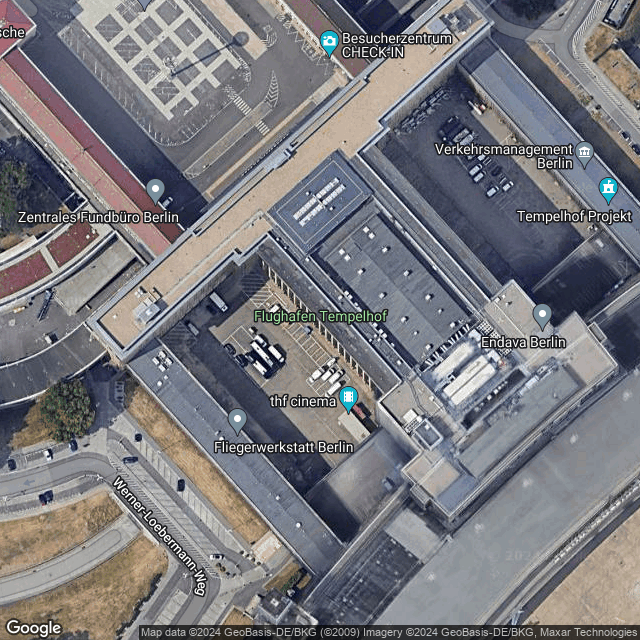

In [11]:
# Test satellite map generation
create_satellite_map("Tempelhof Airport Field")

# Retrieve and display the satellite image from your GCS bucket
storage_client = storage.Client()
bucket = storage_client.bucket(STAGING_BUCKET.replace("gs://", ""))
blob = bucket.blob("reasoning_engine/satellite_map.png")
image_content = blob.download_as_bytes()
Image(image_content)

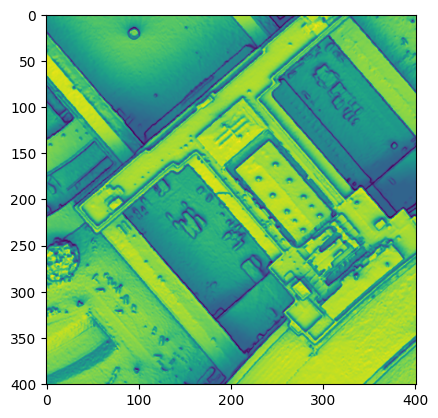

In [12]:
# Test solar potential map
create_solar_potential_map(latitude="52.482115", longitude="13.389191")

# Retrieve and display the solar flux image from your GCS bucket
storage_client = storage.Client()
bucket = storage_client.bucket(STAGING_BUCKET.replace("gs://", ""))
blob = bucket.blob("reasoning_engine/solar_flux_map.tiff")
image_content = blob.download_as_bytes()
with MemoryFile(image_content) as memfile:
    with memfile.open() as dataset:
        img = dataset.read()
plt.imshow(img[0])
plt.show()

### Define agent

The third component of your agent involves adding a reasoning layer, which helps your agent use the tools that you provided to help the end user achieve a higher-level goal.

If you were to use Gemini and Function Calling on their own without a reasoning layer, you would need to handle the process of calling functions and APIs in your application code, and you would need to implement retries and additional logic to ensure that your function calling code is resilient to failures and malformed requests.

Here, you'll use the LangChain agent template provided in the Vertex AI SDK for Reasoning Engine, which brings together the model, tools, and reasoning that you've built up so far:

In [13]:
agent = reasoning_engines.LangchainAgent(
    model=model,
    model_kwargs={"temperature": 0},
    tools=[
        geocode_address,
        search_places,
        create_satellite_map,
        create_solar_potential_map,
    ],
)

### Test your agent locally

Now you can test the model and agent behavior to ensure that it's working as expected before we deploy it:

In [14]:
response = agent.query(
    input="""I'd like to start a community effort to build a solar panel project
    near the Tokyo Big Sight Exhibition Center. What are some nearby government
    offices that might help me?"""
)

display(Markdown(response["output"]))

The closest government office to the Tokyo Big Sight Exhibition Center appears to be the **Tokyo Big Sight Information office**. It's located right on the premises, so it would be a convenient place to start. 


### Deploy your agent on Vertex AI

Now that you've specified a model, tools, and reasoning for your agent and tested it out, you're ready to deploy your agent as a remote service in Vertex AI!

You can re-define the agent to avoid any stateful information in the agent due to our testing in the previous cell:

In [15]:
agent = reasoning_engines.LangchainAgent(
    model=model,
    model_kwargs={"temperature": 0},
    tools=[
        geocode_address,
        search_places,
        create_satellite_map,
        create_solar_potential_map,
    ],
)

Now you're ready to deploy your agent to Reasoning Engine in Vertex AI by calling `reasoning_engines.ReasoningEngine.create()` along with the instance of your agent and the Python packages that your agent requires at runtime:

In [16]:
remote_agent = reasoning_engines.ReasoningEngine.create(
    agent,
    requirements=[
        "google-cloud-aiplatform[langchain,reasoningengine]",
        "cloudpickle==3.0.0",
        "pydantic>=2.10",
        "googlemaps",
        "google-cloud-storage",
        "rasterio",
        "requests",
    ],
)

Using bucket your-bucket-name
Writing to gs://your-bucket-name/reasoning_engine/reasoning_engine.pkl
Writing to gs://your-bucket-name/reasoning_engine/requirements.txt
Creating in-memory tarfile of extra_packages
Writing to gs://your-bucket-name/reasoning_engine/dependencies.tar.gz
Creating ReasoningEngine
Create ReasoningEngine backing LRO: projects/your-project-number/locations/us-central1/reasoningEngines/2553752094951604224/operations/2599704568526798848
ReasoningEngine created. Resource name: projects/your-project-number/locations/us-central1/reasoningEngines/2553752094951604224
To use this ReasoningEngine in another session:
reasoning_engine = vertexai.preview.reasoning_engines.ReasoningEngine('projects/your-project-number/locations/us-central1/reasoningEngines/2553752094951604224')


### Grant Storage Object User access to GCS bucket

Before you send queries to your remote agent, you'll need to grant write permissions to your GCS bucket for the "Storage Object User" role so that the Reasoning Engine service can read and write image files in this tutorial to your bucket:

In [17]:
# Retrieve the project number associated with your project ID
client = resourcemanager_v3.ProjectsClient()
project = client.get_project(name=f"projects/{PROJECT_ID}")
project_number = project.name.split("/")[-1]  # Extract number from resource name

# Grant the "Storage Object User" role on your staging bucket in GCS
storage_client = storage.Client()
bucket = storage_client.bucket(STAGING_BUCKET.replace("gs://", ""))
policy = bucket.get_iam_policy(requested_policy_version=3)
policy.bindings.append(
    {
        "role": "roles/storage.objectUser",
        "members": [
            f"serviceAccount:service-{project_number}@gcp-sa-aiplatform-re.iam.gserviceaccount.com"
        ],
    }
)
bucket.set_iam_policy(policy)

### Test your remotely deployed agent

With all of the core components of your community solar planning agent in place, you can send prompts to your remotely deployed agent to perform different tasks and test that it's working as expected:

In [18]:
response = remote_agent.query(
    input="""I'd like to start a community effort to build a solar panel project
    near the Tokyo Big Sight Exhibition Center. What are some nearby government
    offices that might help me?"""
)

display(Markdown(response["output"]))

The closest government office to the Tokyo Big Sight Exhibition Center appears to be the **Tokyo Big Sight Information office**. It looks like they're closed right now, but you can try going there when they open to see if they can help you with your solar panel project. 


In [19]:
response = remote_agent.query(
    input="""I'd like to start a community effort to build a solar panel project
    near the Tokyo Big Sight Exhibition Center. Can you show me a satellite map
    of the area?"""
)

display(Markdown(response["output"]))

OK. I've created a static map centered around the Tokyo Big Sight Exhibition Center. Is there anything else I can help with?

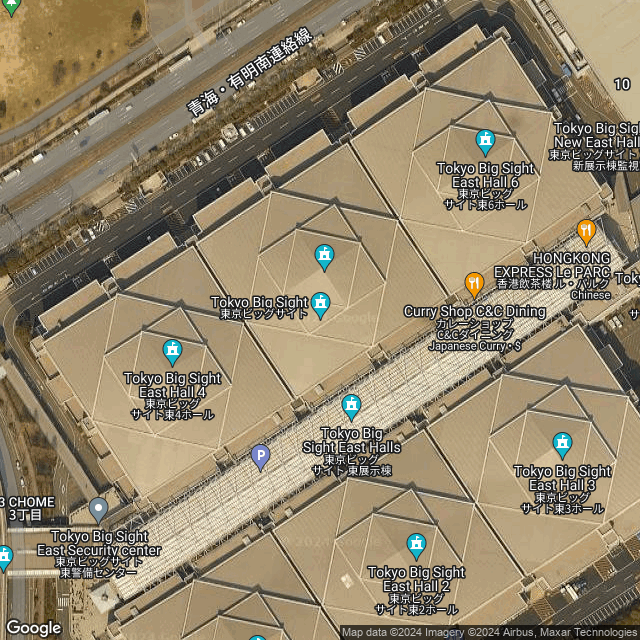

In [20]:
# Retrieve and display the satellite image from your GCS bucket
bucket = storage_client.bucket(STAGING_BUCKET.replace("gs://", ""))
blob = bucket.blob("reasoning_engine/satellite_map.png")
image_content = blob.download_as_bytes()
Image(image_content)

In [21]:
response = remote_agent.query(
    input="""I'd like to start a community effort to build a solar panel project
    near the Tokyo Big Sight Exhibition Center. Can you show me a map the solar
    potential for this area?"""
)

display(Markdown(response["output"]))

OK. I've generated a solar potential map for the area surrounding the Tokyo Big Sight Exhibition Center. The TIFF image is available at the URL in the response.


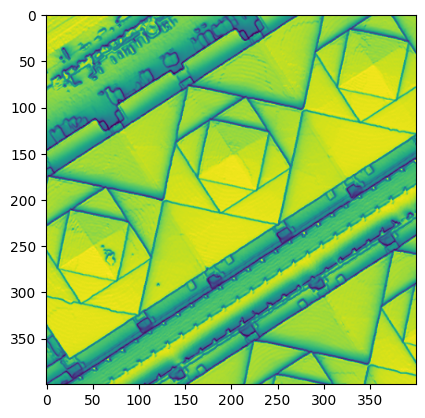

In [22]:
# Retrieve and display the solar flux image from your GCS bucket
bucket = storage_client.bucket(STAGING_BUCKET.replace("gs://", ""))
blob = bucket.blob("reasoning_engine/solar_flux_map.tiff")
image_content = blob.download_as_bytes()
with MemoryFile(image_content) as memfile:
    with memfile.open() as dataset:
        img = dataset.read()
plt.imshow(img[0])
plt.show()

### Querying your deployed agent

You've now deployed your Reasoning Engine agent and can [interact with it in multiple ways](https://cloud.google.com/vertex-ai/generative-ai/docs/reasoning-engine/use), both within this notebook and from other applications or environments. The primary methods for accessing your deployed agent are via the Python client library or through REST API calls. Here's an overview of both methods:

**Method 1: Reusing within this notebook or another Python environment**

You can directly reuse and query the `remote_agent` instance you created in this notebook.

Or, you can instantiate a new instance in another notebook or Python script. To do this, you'll need to retrieve your deployed agent's resource name that uniquely identifies your agent, which is a string that includes the project, location, and Reasoning Engine ID. You can retrieve it by running the following code in the notebook or environment where you created your agent:

In [23]:
remote_agent.resource_name

'projects/your-project-number/locations/us-central1/reasoningEngines/223106848019812424'

Use the resource name to load the agent in your other notebook or Python script, then query the remote agent as usual:

In [24]:
# from vertexai.preview import reasoning_engines

# REASONING_ENGINE_RESOURCE_NAME = "YOUR_REASONING_ENGINE_RESOURCE_NAME"  # Replace with the resource name of your deployed Reasoning Engine

# remote_agent = reasoning_engines.ReasoningEngine(REASONING_ENGINE_RESOURCE_NAME)
# response = remote_agent.query(input=query)

**Method 2: Accessing from other environments via REST API**

Beyond the Python client library, your deployed Vertex AI agent can be [queried using REST API calls](https://cloud.google.com/vertex-ai/generative-ai/docs/reasoning-engine/use), including:

- Python: You can use Python's `requests` library or similar tools to make HTTP calls to the Vertex AI REST API.
- cURL: A command-line tool, cURL allows you to send HTTP requests directly. This is useful for testing and debugging.
- Other Programming Languages: If you prefer a different language for your application, you can use its native HTTP client library to make REST API calls.

In summary, you have access to your deployed Reasoning Engine agent through the Python client library within Python environments, and more universally through its REST API via tools and programming languages of your choosing.

## Cleaning up

After you've finished experimenting, it's a good practice to clean up your cloud resources. You can delete the deployed Reasoning Engine instance to avoid any unexpected charges on your Google Cloud account.

In [25]:
remote_agent.delete()